# Time Series Analysis and Forecasting with Python

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame, concat
import seaborn as sns

%matplotlib inline
import statsmodels as sm

import pandas as pd

In [3]:

dff = read_csv('C:/Users/Shehzad/Desktop/Git/Time series forecasting/SalesPP.csv', header=0)

df1=dff
df1 = pd.Series(df1["Sales"].values,
                      index = pd.DatetimeIndex(data = (tuple(pd.date_range("10/11/2008",
                                                                           periods = 48,
                                                                           freq ='MS'))),
                                               freq='MS')).dropna()

df1 = np.log(df1)


# check dataset in depth. check Acf and PACF Plots

C:\Users\Shehzad\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


(<matplotlib.axes._subplots.AxesSubplot at 0x213f5a5a240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213f5d4bf60>)

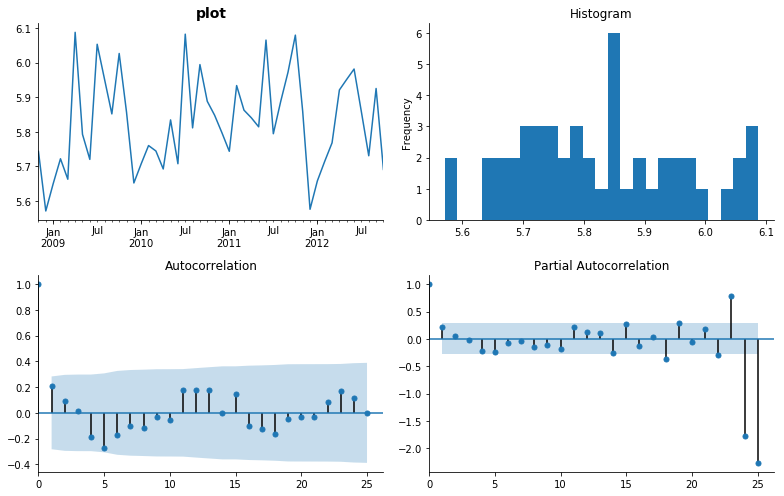

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def tsplot2(y, title, lags=None, figsize=(11,7)):
   

    fig =plt.figure(figsize = figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hist_ax = plt.subplot2grid(layout,(0,1))
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight ='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

tsplot2(df1,title='plot', lags = 25)


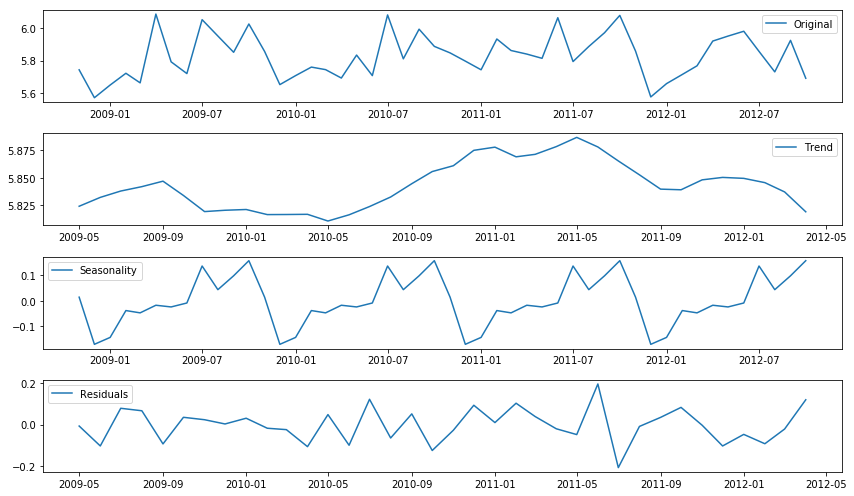

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df1):
    decomposition = seasonal_decompose(df1)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig = plt.figure(figsize = (12,7))
    plt.subplot(411)
    plt.plot(df1, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
decompose(df1)

In [6]:
#check data is stationary or not
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df1):
    (" > Is the data stationary ?")
    dftest = adfuller(df1, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

check_stationarity(df1)


Test statistic = -5.341
P-value = 0.000
Critical values :
	1%: -3.5778480370438146 - The data is  stationary with 99% confidence
	5%: -2.925338105429433 - The data is  stationary with 95% confidence
	10%: -2.6007735310095064 - The data is  stationary with 90% confidence


#data with differencing
df2 = df1.diff().dropna()

#check the stationarity
check_stationarity(df2)



# Differencing can work for making data stationary

In [11]:
train= pd.DataFrame(df1[:38].dropna())
test= pd.DataFrame(df1[38:].dropna())

test.columns = ['Sales']
train.columns = ['Sales']


df1.index =  pd.DatetimeIndex(df1.index)
#set freq
df1.index.freq ='MS'

df1.head()

2008-11-01    5.743408
2008-12-01    5.571425
2009-01-01    5.649641
2009-02-01    5.722181
2009-03-01    5.663074
Freq: MS, dtype: float64

In [8]:
import statsmodels.api as sm

#below code takes time to run
from pyramid.arima import auto_arima

#check seasonal P,D,Q parameters
auto_arima(df1, seasonal =True, m=12, D=1,trend ='c', information_criterion = 'aic', stepwise =True).summary()



C:\Users\Shehzad\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
C:\Users\Shehzad\Anaconda3\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Shehzad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                  17.945
Date:                  Fri, 28 Jun 2019   AIC                            -29.890
Time:                          16:16:06   BIC                            -25.139
Sample:                               0   HQIC                           -28.232
                                   - 48                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.034      0.252      0.801      -0.058       0.075
ar.S.L12      -0.4635      0.305     -1.519      0.129      -1.061       0.135
sigma2         0.0199      0.006      3.288      0.001       0.008       0.032
===================================================================================
Ljung-Box (Q):                       28.64   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.77   Prob(JB):                         0.49
Heteroskedasticity (H):               1.11   Skew:                            -0.42
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:

#check P, D ,Q
auto_arima(df1, seasonal =True, m=12, D=0,trend ='c', information_criterion = 'aic', stepwise =True).summary()


C:\Users\Shehzad\Anaconda3\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Shehzad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Shehzad\Anaconda3\lib\site-packages\pyramid\arima\auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\She

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  29.094
Date:                Fri, 28 Jun 2019   AIC                            -52.188
Time:                        16:16:26   BIC                            -46.575
Sample:                             0   HQIC                           -50.067
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5647      1.046      4.364      0.000       2.515       6.615
ar.L1          0.2169      0.180      1.203      0.229      -0.136       0.570
sigma2         0.0174      0.004      3.913      0.000       0.009       0.026
===================================================================================
Ljung-Box (Q):                       37.47   Jarque-Bera (JB):                 2.04
Prob(Q):                              0.58   Prob(JB):                         0.36
Heteroskedasticity (H):               0.71   Skew:                             0.46
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

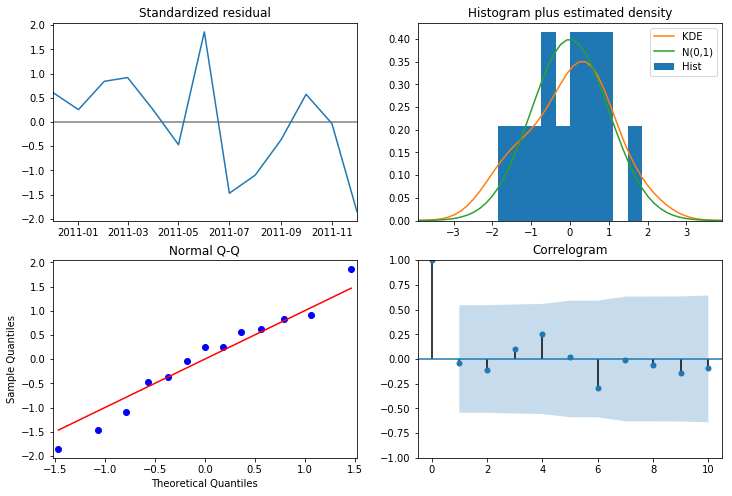

In [12]:
#INITIAL FORECASTING
fit3 = sm.tsa.statespace.SARIMAX(train, order=(1, 0, 0),seasonal_order=(1,1,0,12), trend='c',enforce_stationarity=False,
                                            enforce_invertibility=False).fit()

fit3.summary()
fit3.plot_diagnostics(figsize=(12,8))
plt.show()


# Create a forecast Dataframe

In [13]:

SARIMAX_forecasttest = round(fit3.forecast(steps = 10), 2)
idx = test.index

SARIMAX_forecasttest = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecasttest))),
columns=['Date','Forecast']).set_index('Date')


C:\Users\Shehzad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


# Check Model residuals

Text(0.5, 1.0, 'Initial Sarima Model residual Autocorrelation')

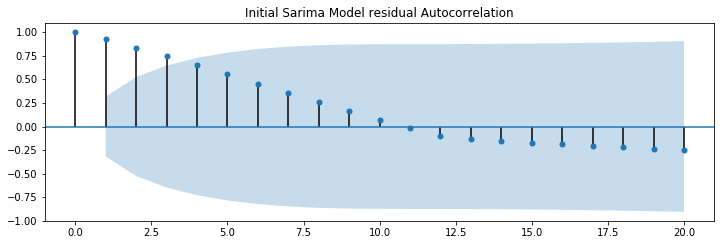

In [15]:

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(fit3.resid, lags = 20, ax=ax1)
plt.title('Initial Sarima Model residual Autocorrelation')


# Plot the results

Text(0.5, 1.0, 'Initial Sarima Model')

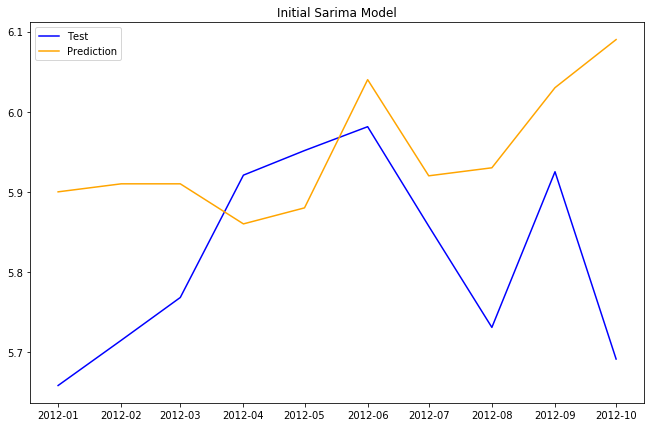

In [16]:
plt.figure(figsize=(11,7))
#plt.plot(train.HH_NLSN_PRJCTN, label = 'train')
plt.plot(test.Sales, color ='blue', label = 'Test')
plt.plot(SARIMAX_forecasttest, color ='orange', label ='Prediction')
#plt.plot(train)
plt.legend()
plt.title('Initial Sarima Model')

# check accuracy using MAPE

In [17]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print('Total Error in Percentage')
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

#accuracy of forecast
mean_absolute_percentage_error(np.exp(test),np.exp(SARIMAX_forecasttest))


Total Error in Percentage


17.15472926257465

# Forecast in to unknown future



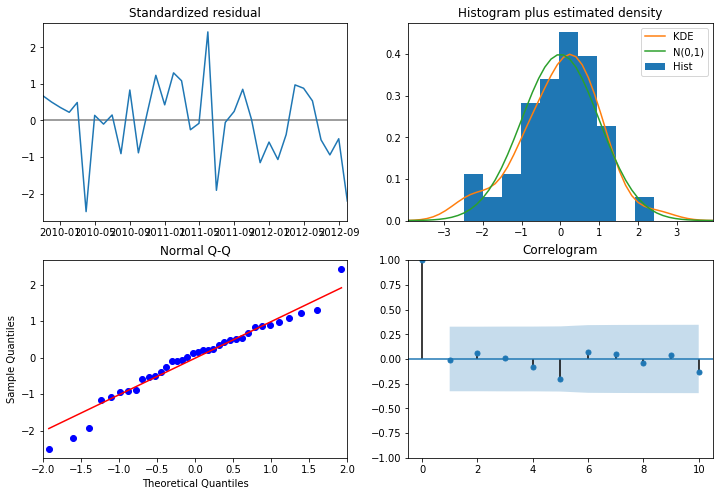

In [18]:

fit4 = sm.tsa.statespace.SARIMAX(df1, order=(1, 0, 0),seasonal_order=(1,1,0,12), trend ='c').fit()
fit4.summary()# AIC-124.276'''

#model diagnostics helps in understanding the model
fit4.plot_diagnostics(figsize=(12,8))
fit4.summary()
plt.show()


In [20]:

#predicting test set
yhat = pd.DataFrame(fit4.predict(start=38, end=48, freq='MS'))

SARIMAX_forecast = round(fit4.forecast(steps = 10), 2)




C:\Users\Shehzad\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


# Plot forecast

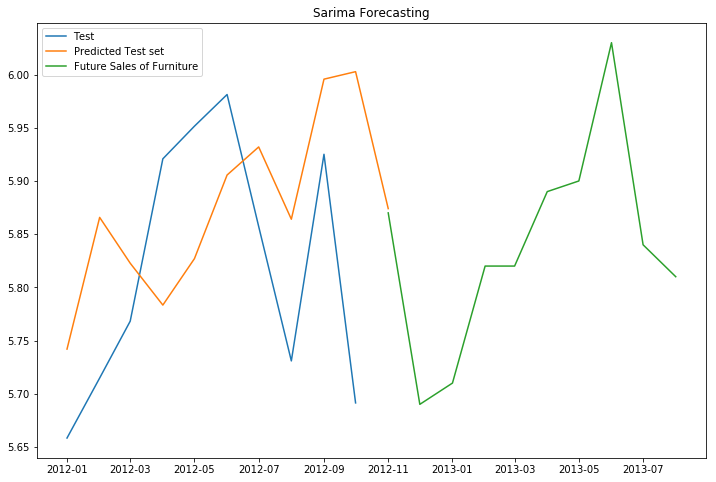

In [22]:

fig = plt.figure(figsize = (12,8))
#plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(yhat, label='Predicted Test set')
plt.plot(SARIMAX_forecast, label='Future Sales of Furniture')
plt.title('Sarima Forecasting')
plt.legend()